In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir(r"D:\Research\UBI车险\data\demo_data")

In [2]:
# import data
x_col_names = ["Distance","Average_speed","acceleration_events","sudden_starts","abrupt_lane_changes","intense_brakes","sudden_stops","abrupt_steerings"]
def import_data(i):
    file_name = "fold_{}_1-10.xlsx".format(i)
    x_train = pd.DataFrame(columns = x_col_names)
    x_test = pd.DataFrame(columns = x_col_names)
    y_train = pd.DataFrame(columns = ["score"])
    y_test = pd.DataFrame(columns = ["score"])

    x_train_part = pd.read_excel(file_name,header = None, names = x_col_names,sheet_name = "xtrain")
    x_test_part = pd.read_excel(file_name,header = None, names = x_col_names,sheet_name = "xtest")
    x_train = pd.concat([x_train,x_train_part],axis = 0)
    x_test = pd.concat([x_test,x_test_part],axis = 0)

    y_train_part = pd.read_excel(file_name,header = None, names = ["score"],sheet_name = "ytrain")
    y_test_part = pd.read_excel(file_name,header = None, names = ["score"],sheet_name = "ytest")
    y_train = pd.concat([y_train,y_train_part],axis = 0)
    y_test = pd.concat([y_test,y_test_part],axis = 0)

    df_train = pd.concat([x_train,y_train],axis = 1)
    df_test = pd.concat([x_test,y_test],axis = 1)
    df_train = df_train.drop_duplicates(subset = x_col_names)
    df_test = df_test.drop_duplicates(subset = x_col_names)

    for col in x_col_names + ["score"]:
        df_train[col] = df_train[col].astype(int)
        df_test[col] = df_test[col].astype(int)
    return df_train,df_test

In [3]:
df_train,df_test = import_data(1)
df_train.head(5)

,Distance,Average_speed,acceleration_events,sudden_starts,abrupt_lane_changes,intense_brakes,sudden_stops,abrupt_steerings,score
0,5,8,3,6,3,3,4,5,4
1,9,9,5,5,3,0,0,6,6
2,3,3,2,2,3,2,2,0,7
3,7,4,3,3,3,5,2,4,4
4,9,10,6,3,8,5,0,4,4


In [4]:
# define varaibles

$y$ = score

$x_1$ = Distance, 

$x_2$ = Average speed, 

$x_3$ = # of acceleration events, 

$x_4$ = # of sudden starts, 

$x_5$ = # of abrupt lane changes, 

$x_6$ = # intence brakes

$x_7$ = # of sudden stops, 

$x_8$ = # of abrupt steering

In [5]:
# 5 Machine Learning Methods

Driver Safety Index(Saiprasert et al., 2014)

Genetic Programming(López et al., 2018)

Bayesian Ridge Regression(Eran et al., 2012)

Random Forest(Breiman, 2001)

neural network(Haykin, 2003)


In [6]:
# Model Evaluation

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (\hat{y} - y)^2}
$$

In [7]:
RMSE_model_list = []
MSE_model_list = []

In [8]:
# Driver Safety Index(Saiprasert et al., 2014)

$$
y = 1 - \frac{1}{x_1} ( -1.0580 x_2 +  1.3695 x_3 +  2.3714 x_4 +  1.2127 x_5 +  1.7082 x_6 +  0.4527 x_7 +  1.2374 x_8 )
$$

In [9]:
from sklearn.linear_model import LinearRegression
RMSE_list = []
MSE_list = []
for i in range(1,11):
    df_train,df_test = import_data(i)
    lm_model = LinearRegression(fit_intercept = False)
    x_col_names_lm = ["Average_speed","acceleration_events","sudden_starts","abrupt_lane_changes","intense_brakes","sudden_stops","abrupt_steerings"]
    x_train_lm = np.array(df_train[x_col_names_lm]) / np.array(df_train["Distance"]).reshape(len(df_train),1)
    x_test_lm = np.array(df_test[x_col_names_lm]) / np.array(df_test["Distance"]).reshape(len(df_test),1)
    y_train_lm = np.array(10 - df_train["score"])
    lm_model.fit(x_train_lm ,y_train_lm)

    df_test["pred_lm"] = 10 - np.dot(lm_model.coef_,x_test_lm.T)
    MSE = (df_test["score"] - df_test["pred_lm"])**2
    MSE_list = MSE_list + MSE.tolist()
    RMSE = np.sqrt(np.mean(MSE))
    RMSE_list.append(RMSE)
print("RMSE: ",np.mean(RMSE_list))
RMSE_model_list.append({"model":"Safety Index","RMSE":np.mean(RMSE_list)})
MSE_model_list.append({"model":"Safety Index","MSE":MSE_list})

RMSE:  2.927742203640457


In [10]:
# Genetic Programming(López et al., 2018)

$$
\begin{aligned}
y=& 9.153-0.1119 x_6-0.1119 x_7-0.1119 x_8-2.516 e^{-\frac{1.0 x_2}{x_4}} \\
&-0.1119 e^{-1.0 x_1}-0.01742 x_2\left(x_2+e^{-1.0 x_1}+e^{-1.0 x_4}\right) \\
&-0.2239 x_2
\end{aligned}
$$

In [11]:
RMSE_list = []
MSE_list = []
for i in range(1,11):
    df_train,df_test = import_data(i)
    df_test["pred_gp"] = 9.153 - 0.1119 * df_test["intense_brakes"] - 0.1119 * df_test["sudden_stops"] - 0.1119 * df_test["abrupt_steerings"] - 2.516 * np.exp(-df_test["Average_speed"] / df_test["sudden_starts"]) - \
    0.1119 * np.exp(-df_test["Distance"]) - 0.01742 * df_test["Average_speed"] * (df_test["Average_speed"] + np.exp(-df_test["Distance"]) + np.exp(-df_test["sudden_starts"])) - 0.2239 * df_test["Average_speed"]
    MSE = (df_test["score"] - df_test["pred_gp"])**2
    MSE_list = MSE_list + MSE.tolist()
    RMSE = np.sqrt(np.mean((df_test["score"] - df_test["pred_gp"])**2))
    RMSE_list.append(RMSE)
print("RMSE: ",np.mean(RMSE_list))
RMSE_model_list.append({"model":"Genetic Programming","RMSE":np.mean(RMSE_list)})
MSE_model_list.append({"model":"Genetic Programming","MSE":MSE_list})

RMSE:  1.2234006634096177


In [12]:
# Bayesian Ridge Regression(Eran et al., 2012)

$$
y = 8.2492 + 0.03783x_1  - 0.2751x_2  - 0.003735x_3  - 0.1322x_4  - 0.01145x_5  - 0.1122 x_6 - 0.1501x_7  -0.1301x_8
$$

In [13]:
from sklearn.linear_model import BayesianRidge
RMSE_list = []
MSE_list = []
for i in range(1,11):
    df_train,df_test = import_data(i)
    br_model = BayesianRidge(fit_intercept = True,verbose = False)
    x_train_br = np.array(df_train[x_col_names])
    x_test_br = np.array(df_test[x_col_names])
    y_train_br = np.array(df_train["score"])
    br_model.fit(x_train_br,y_train_br)

    df_test["pred_br"] = np.dot(br_model.coef_,x_test_br.T) + br_model.intercept_
    MSE = (df_test["score"] - df_test["pred_br"])**2
    MSE_list = MSE_list + MSE.tolist()
    RMSE = np.sqrt(np.mean((df_test["score"] - df_test["pred_br"])**2))
    RMSE_list.append(RMSE)
print("RMSE: ",np.mean(RMSE_list))
RMSE_model_list.append({"model":"BayesianRidge","RMSE":np.mean(RMSE_list)})
MSE_model_list.append({"model":"BayesianRidge","MSE":MSE_list})

RMSE:  1.2789433772391507


In [14]:
# Random Forest(Breiman, 2001)
from sklearn.ensemble import RandomForestRegressor
RMSE_list = []
MSE_list = []
for i in range(1,11):
    df_train,df_test = import_data(i)
    rf_model = RandomForestRegressor()
    x_train_rf = np.array(df_train[x_col_names])
    x_test_rf = np.array(df_test[x_col_names])
    y_train_rf = np.array(df_train["score"])
    rf_model.fit(x_train_rf,y_train_rf)

    df_test["pred_rf"] = rf_model.predict(x_test_rf)
    MSE = (df_test["score"] - df_test["pred_rf"])**2
    MSE_list = MSE_list + MSE.tolist()
    RMSE = np.sqrt(np.mean((df_test["score"] - df_test["pred_rf"])**2))
    RMSE_list.append(RMSE)
print("RMSE: ",np.mean(RMSE_list))
RMSE_model_list.append({"model":"Random Forest","RMSE":np.mean(RMSE_list)})
MSE_model_list.append({"model":"Random Forest","MSE":MSE_list})

RMSE:  1.271067162630629


In [15]:
# neural network(Haykin, 2003)
from sklearn.neural_network import MLPRegressor
RMSE_list = []
MSE_list = []
for i in range(1,11):
    df_train,df_test = import_data(i)
    nn_model = MLPRegressor(max_iter=200,batch_size = 10,learning_rate_init = 0.01)
    x_train_nn = np.array(df_train[x_col_names])
    x_test_nn = np.array(df_test[x_col_names])
    y_train_nn = np.array(df_train["score"])
    nn_model.fit(x_train_nn,y_train_nn)
    
    df_test["pred_nn"] = nn_model.predict(x_test_nn)
    MSE = (df_test["score"] - df_test["pred_nn"])**2
    MSE_list = MSE_list + MSE.tolist()
    RMSE = np.sqrt(np.mean((df_test["score"] - df_test["pred_nn"])**2))
    RMSE_list.append(RMSE)
print("RMSE: ",np.mean(RMSE_list))
RMSE_model_list.append({"model":"Neral Network","RMSE":np.mean(RMSE_list)})
MSE_model_list.append({"model":"Neral Network","MSE":MSE_list})

RMSE:  1.5402268284195961


In [42]:
RMSE_model_comparison = pd.DataFrame(RMSE_model_list)
RMSE_model_comparison = RMSE_model_comparison.sort_values(by = "RMSE",ascending = True)
RMSE_model_comparison.sort_values(by = "RMSE")

,model,RMSE
1,Genetic Programming,1.223401
3,Random Forest,1.271067
2,BayesianRidge,1.278943
4,Neral Network,1.540227
0,Safety Index,2.927742


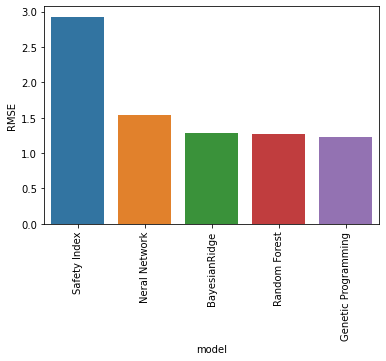

In [43]:
sns.barplot(data=RMSE_model_comparison.sort_values(by = "RMSE",ascending = False), x="model", y="RMSE")
plt.xticks(rotation = 90)
plt.show()

In [25]:
MSE_model_comparison = pd.DataFrame(columns = ["model","MSE"])
for MSE_model in MSE_model_list:
    MSE_model_comparison = pd.concat([MSE_model_comparison,pd.DataFrame(MSE_model)],axis = 0)
MSE_model_comparison

,model,MSE
0,Safety Index,3.394696
1,Safety Index,0.654624
2,Safety Index,2.543202
3,Safety Index,0.146111
4,Safety Index,10.115589
...,...,...
195,Neral Network,0.165448
196,Neral Network,0.864994
197,Neral Network,4.214332
198,Neral Network,0.071369


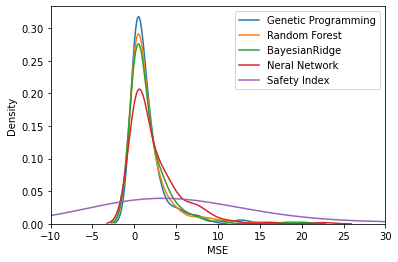

In [35]:
sns.kdeplot(MSE_model_comparison.loc[MSE_model_comparison.model == "Genetic Programming","MSE"],label = "Genetic Programming")
sns.kdeplot(MSE_model_comparison.loc[MSE_model_comparison.model == "Random Forest","MSE"],label = "Random Forest")
sns.kdeplot(MSE_model_comparison.loc[MSE_model_comparison.model == "BayesianRidge","MSE"],label = "BayesianRidge")
sns.kdeplot(MSE_model_comparison.loc[MSE_model_comparison.model == "Neral Network","MSE"],label = "Neral Network")
sns.kdeplot(MSE_model_comparison.loc[MSE_model_comparison.model == "Safety Index","MSE"],label = "Safety Index")
plt.legend()
plt.xlim(-10,30)
plt.show()